# H1-B Visa Petition Data Analysis (2014 -2016)



## Overview

The H1-B visa program allows foreign workers with specialized skills to work in the United States.   

The dataset contains data from the employer’s Labor Condition Application and the case certification determinations processed by the Office of Foreign Labor Certification (OFLC). The analysis focuses on exploring the influence of factors such as the location, industry, company and wages of employees.

The first step was data processing, cleaning and transformation.  Data for the three years(2014-2016) were loaded and merged into a single dataframe with some columns renamed for uniformity. A new column title year was also created to keep track of the corresponding year of the data entry. Columns that were not neccessary for the analysis were removed.  The dataframe was then investigated for duplicate, inconsistent and null values. 


The dataset had duplicate values which were removed. The rows with null values were found to be minimal and were also removed from the dataset. A lot of entires were not in the same format, wages in particular. The unit of pay of employee wages and prevailing wage were given in ‘week’,'bi-weekly', ‘hours’, ‘month’, and ‘year’. The data was therefore transformed into a single unit of pay- year. However it was found that some wage amount entries did not correspond to their unit of pay which could have resulted from data entry errors. To account for this an assumption was made as to the threshold of the respective wage units before modification. This however did not still guarantee that all errorneous entries had been addressed. Outliers were therefore removed as an added measure.  

The dataset was now ready for analysis and was investigated to show relationships. The key findings were as follows: 

 
1. Between 2014 and 2016, a total of 1,748,422 H1-B visa petitions were filed

2. The top five employers who filed the most H1-B visa petitions were INFOSYS LIMITED, TATA CONSULTANCY SERVICES LIMITED, WIPRO LIMITED, IBM INDIA PRIVATE LIMITED and ACCENTURE LLP.


3. The most common job titles for H1-B visa petitions were PROGRAMMER ANALYST, SOFTWARE ENGINEER, COMPUTER PROGRAMMER, SYSTEMS ANALYST AND SOFTWARE DEVELOPER.


4. The average prevailing wage for H1-B visa petitions was 68,039.65 per year, with the highest prevailing wage being 12,1930.00 and the lowest prevailing wage being 16,764.80.


5. The average 'wage rate of pay from' for H1-B visa petitions was 75,359.85 per year, with the highest 'wage rate of pay from' being 13,8227.00 and the lowest 'wage rate of pay from' being 15,500.00. 


6. The majority of H1-B visa petitions filed were certified (88%), with only a small percentage certified-withdrawn (7%), withdrawn (3%), denied (2%) and little or no amount rejected (Just two were rejected across the entire dataset).


7. The top three states where H1-B visa petitions were filed were New york, Houston, and Atlanta.
     
     
              


## Data Processing

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 


## Reading excel files into dataframe from 2014 - 2016

In [2]:
df14 = pd.read_excel('H-1B_FY14_Q4.xlsx')
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519504 entries, 0 to 519503
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   LCA_CASE_NUMBER                 519504 non-null  object        
 1   STATUS                          519504 non-null  object        
 2   LCA_CASE_SUBMIT                 519504 non-null  datetime64[ns]
 3   DECISION_DATE                   519504 non-null  datetime64[ns]
 4   VISA_CLASS                      519504 non-null  object        
 5   LCA_CASE_EMPLOYMENT_START_DATE  519500 non-null  datetime64[ns]
 6   LCA_CASE_EMPLOYMENT_END_DATE    519499 non-null  datetime64[ns]
 7   LCA_CASE_EMPLOYER_NAME          519476 non-null  object        
 8   LCA_CASE_EMPLOYER_ADDRESS       519462 non-null  object        
 9   LCA_CASE_EMPLOYER_CITY          519477 non-null  object        
 10  LCA_CASE_EMPLOYER_STATE         519458 non-null  object 

In [3]:
df14.head()

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,DECISION_DATE,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,OTHER_WAGE_SOURCE_1,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,OFLC ONLINE DATA CENTER,2013.0,ST. LOUIS,MO,49566.0,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310.0
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,OFLC ONLINE DATA CENTER,2013.0,INDIANAPOLIS,IN,64251.0,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320.0
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,OFLIC ONLINE,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541330.0
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,OFLC ONLINE DATA CENTER,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333922.0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,OFLC ONLINE DATA CENTER,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541519.0


In [4]:
# Add a new column called "year" and fill it with 2014 to dinstiguish the petitions by the year the data was generated

df14['YEAR'] = 2014

In [5]:
df14.info()
df14.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519504 entries, 0 to 519503
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   LCA_CASE_NUMBER                 519504 non-null  object        
 1   STATUS                          519504 non-null  object        
 2   LCA_CASE_SUBMIT                 519504 non-null  datetime64[ns]
 3   DECISION_DATE                   519504 non-null  datetime64[ns]
 4   VISA_CLASS                      519504 non-null  object        
 5   LCA_CASE_EMPLOYMENT_START_DATE  519500 non-null  datetime64[ns]
 6   LCA_CASE_EMPLOYMENT_END_DATE    519499 non-null  datetime64[ns]
 7   LCA_CASE_EMPLOYER_NAME          519476 non-null  object        
 8   LCA_CASE_EMPLOYER_ADDRESS       519462 non-null  object        
 9   LCA_CASE_EMPLOYER_CITY          519477 non-null  object        
 10  LCA_CASE_EMPLOYER_STATE         519458 non-null  object 

,LCA_CASE_NUMBER,STATUS,LCA_CASE_SUBMIT,DECISION_DATE,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,LCA_CASE_EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,YR_SOURCE_PUB_1,LCA_CASE_WORKLOC2_CITY,LCA_CASE_WORKLOC2_STATE,PW_2,PW_UNIT_2,PW_SOURCE_2,OTHER_WAGE_SOURCE_2,YR_SOURCE_PUB_2,LCA_CASE_NAICS_CODE,YEAR
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,2013.0,ST. LOUIS,MO,49566.0,Year,OES,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,611310.0,2014
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,2013.0,INDIANAPOLIS,IN,64251.0,Year,Other,OFLC ONLINE DATA CENTER,OFLC ONLINE DATA CENTER,621320.0,2014
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541330.0,2014
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333922.0,2014
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,541519.0,2014


In [6]:
df15 = pd.read_excel('H-1B_Disclosure_Data_FY15_Q4.xlsx')
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618804 entries, 0 to 618803
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CASE_NUMBER            618804 non-null  object        
 1   CASE_STATUS            618804 non-null  object        
 2   CASE_SUBMITTED         618804 non-null  datetime64[ns]
 3   DECISION_DATE          618804 non-null  datetime64[ns]
 4   VISA_CLASS             618804 non-null  object        
 5   EMPLOYMENT_START_DATE  618785 non-null  object        
 6   EMPLOYMENT_END_DATE    618785 non-null  object        
 7   EMPLOYER_NAME          618781 non-null  object        
 8   EMPLOYER_ADDRESS1      618778 non-null  object        
 9   EMPLOYER_ADDRESS2      310861 non-null  object        
 10  EMPLOYER_CITY          618773 non-null  object        
 11  EMPLOYER_STATE         618761 non-null  object        
 12  EMPLOYER_POSTAL_CODE   618766 non-null  obje

In [7]:
df15.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,PW_WAGE_SOURCE_YEAR,PW_WAGE_SOURCE_OTHER,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,H-1B,02/09/2015,02/28/2015,"MEDTRONIC, INC.",710 MEDTRONIC PARKWAY NE,NaN,...,2014.0,ONLINE DATA SURVEY,20000 -,Year,N,N,EDEN PRAIRIE,STERNS,CA,55412
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,H-1B,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,905 ASP AVE,NEL BLDG 207,...,2014.0,OFLC ONLINE DATA CENTER,85000.00 -,Year,N,N,NORMAN,CLEVELAND,OK,73019
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,H-1B,01/07/2013,01/06/2016,NOKIA INC.,6021 CONNECTION DRIVE,NaN,...,2012.0,OFLC ONLINE DATA CENTER,94000 -,Year,N,N,SAN DIEGO,SAN DIEGO,CA,92127
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,H-1B,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",9510 N. HOUSTON ROSSLYN ROAD,NaN,...,2014.0,OFLC ONLINE DATA CENTER,66000 - 70000,Year,N,N,HOUSTON,HARRIS,TX,77088
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,H-1B,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,8250 JONES BRANCH DRIVE,MSA3E,...,2014.0,OFLC ONLINE DATA CENTER,97000 - 143300,Year,N,N,MCLEAN,FAIRFAX,VA,22102


In [8]:
# Add a new column called "year" and fill it with 2015 to dinstiguish the petitions by the year the data was generated

df15['YEAR'] = 2015

In [9]:
df15.info()
df15.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618804 entries, 0 to 618803
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CASE_NUMBER            618804 non-null  object        
 1   CASE_STATUS            618804 non-null  object        
 2   CASE_SUBMITTED         618804 non-null  datetime64[ns]
 3   DECISION_DATE          618804 non-null  datetime64[ns]
 4   VISA_CLASS             618804 non-null  object        
 5   EMPLOYMENT_START_DATE  618785 non-null  object        
 6   EMPLOYMENT_END_DATE    618785 non-null  object        
 7   EMPLOYER_NAME          618781 non-null  object        
 8   EMPLOYER_ADDRESS1      618778 non-null  object        
 9   EMPLOYER_ADDRESS2      310861 non-null  object        
 10  EMPLOYER_CITY          618773 non-null  object        
 11  EMPLOYER_STATE         618761 non-null  object        
 12  EMPLOYER_POSTAL_CODE   618766 non-null  obje

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,PW_WAGE_SOURCE_OTHER,WAGE_RATE_OF_PAY,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,YEAR
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,H-1B,02/09/2015,02/28/2015,"MEDTRONIC, INC.",710 MEDTRONIC PARKWAY NE,NaN,...,ONLINE DATA SURVEY,20000 -,Year,N,N,EDEN PRAIRIE,STERNS,CA,55412,2015
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,H-1B,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,905 ASP AVE,NEL BLDG 207,...,OFLC ONLINE DATA CENTER,85000.00 -,Year,N,N,NORMAN,CLEVELAND,OK,73019,2015
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,H-1B,01/07/2013,01/06/2016,NOKIA INC.,6021 CONNECTION DRIVE,NaN,...,OFLC ONLINE DATA CENTER,94000 -,Year,N,N,SAN DIEGO,SAN DIEGO,CA,92127,2015
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,H-1B,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",9510 N. HOUSTON ROSSLYN ROAD,NaN,...,OFLC ONLINE DATA CENTER,66000 - 70000,Year,N,N,HOUSTON,HARRIS,TX,77088,2015
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,H-1B,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,8250 JONES BRANCH DRIVE,MSA3E,...,OFLC ONLINE DATA CENTER,97000 - 143300,Year,N,N,MCLEAN,FAIRFAX,VA,22102,2015


In [10]:
# to split wage rate of pay from and to into two seperate columns
def remove_from(x):
    if x.split('-')[0]== '' or x.split('-')[0]== ' N/A':
        return 0.0
    return float(x.split('-')[0])

def remove_to(x):
    if x.split('-')[1]== ''or x.split('-')[1]== ' N/A':
        return 0.0
    return float(x.split('-')[1]) 


In [11]:
df15['WAGE_RATE_OF_PAY_FROM'] = df15['WAGE_RATE_OF_PAY'].apply(remove_from)
df15['WAGE_RATE_OF_PAY_TO'] = df15['WAGE_RATE_OF_PAY'].apply(remove_to)

In [12]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618804 entries, 0 to 618803
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CASE_NUMBER            618804 non-null  object        
 1   CASE_STATUS            618804 non-null  object        
 2   CASE_SUBMITTED         618804 non-null  datetime64[ns]
 3   DECISION_DATE          618804 non-null  datetime64[ns]
 4   VISA_CLASS             618804 non-null  object        
 5   EMPLOYMENT_START_DATE  618785 non-null  object        
 6   EMPLOYMENT_END_DATE    618785 non-null  object        
 7   EMPLOYER_NAME          618781 non-null  object        
 8   EMPLOYER_ADDRESS1      618778 non-null  object        
 9   EMPLOYER_ADDRESS2      310861 non-null  object        
 10  EMPLOYER_CITY          618773 non-null  object        
 11  EMPLOYER_STATE         618761 non-null  object        
 12  EMPLOYER_POSTAL_CODE   618766 non-null  obje

In [13]:
df15.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
0,I-200-09121-701936,WITHDRAWN,2015-02-05,2015-02-05,H-1B,02/09/2015,02/28/2015,"MEDTRONIC, INC.",710 MEDTRONIC PARKWAY NE,NaN,...,Year,N,N,EDEN PRAIRIE,STERNS,CA,55412,2015,20000.0,0.0
1,I-200-09146-796321,CERTIFIED,2014-12-12,2014-12-18,H-1B,01/05/2015,01/04/2018,UNIVERSITY OF OKLAHOMA,905 ASP AVE,NEL BLDG 207,...,Year,N,N,NORMAN,CLEVELAND,OK,73019,2015,85000.0,0.0
2,I-200-09180-329758,WITHDRAWN,2013-01-03,2014-12-15,H-1B,01/07/2013,01/06/2016,NOKIA INC.,6021 CONNECTION DRIVE,NaN,...,Year,N,N,SAN DIEGO,SAN DIEGO,CA,92127,2015,94000.0,0.0
3,I-200-09183-259985,CERTIFIED,2015-03-10,2015-03-16,H-1B,09/07/2015,09/07/2018,"OMRON OILFIELD AND MARINE, INC.",9510 N. HOUSTON ROSSLYN ROAD,NaN,...,Year,N,N,HOUSTON,HARRIS,TX,77088,2015,66000.0,70000.0
4,I-200-09189-800933,CERTIFIED,2014-12-17,2014-12-23,H-1B,06/06/2015,06/05/2018,FEDERAL HOME LOAN MORTGAGE CO.,8250 JONES BRANCH DRIVE,MSA3E,...,Year,N,N,MCLEAN,FAIRFAX,VA,22102,2015,97000.0,143300.0


In [14]:
df16 = pd.read_excel('H-1B_Disclosure_Data_FY16.xlsx')
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647852 entries, 0 to 647851
Data columns (total 40 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CASE_NUMBER            647852 non-null  object        
 1   CASE_STATUS            647852 non-null  object        
 2   CASE_SUBMITTED         647852 non-null  datetime64[ns]
 3   DECISION_DATE          647852 non-null  datetime64[ns]
 4   VISA_CLASS             647852 non-null  object        
 5   EMPLOYMENT_START_DATE  647835 non-null  datetime64[ns]
 6   EMPLOYMENT_END_DATE    647827 non-null  datetime64[ns]
 7   EMPLOYER_NAME          647837 non-null  object        
 8   EMPLOYER_ADDRESS       647847 non-null  object        
 9   EMPLOYER_CITY          647846 non-null  object        
 10  EMPLOYER_STATE         647818 non-null  object        
 11  EMPLOYER_POSTAL_CODE   647831 non-null  object        
 12  EMPLOYER_COUNTRY       647849 non-null  obje

In [15]:
df16.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-12240-490687,CERTIFIED-WITHDRAWN,2012-08-27,2015-10-16,H-1B,2013-02-25,2016-02-24,UNIVERSITY OF MICHIGAN,"PIERPONT COMMONS, INTERNATIONAL CENTER",ANN ARBOR,...,41000.00,0.0,Year,N,N,ANN ARBOR,WASHTENAW,MI,48109,2012-08-31
1,I-200-13053-847481,CERTIFIED-WITHDRAWN,2013-02-25,2016-01-13,H-1B,2013-08-24,2016-08-23,"GOODMAN NETWORKS, INC.","6400 INTERNATIONAL PARKWAY, SUITE 1000",PLANO,...,400000.00,0.0,Year,N,N,PLANO,COLLIN,TX,75093,2013-03-01
2,I-200-13088-054259,CERTIFIED-WITHDRAWN,2013-04-23,2015-12-10,H-1B,2013-04-29,2016-04-28,"PORTS AMERICA GROUP, INC.",525 WASHINGTON BOULEVARD,JERSEY CITY,...,264000.00,451100.0,Year,N,N,JERSEY CITY,HUDSON,NJ,07310,2013-04-29
3,I-200-13144-034110,CERTIFIED-WITHDRAWN,2013-05-24,2016-01-19,H-1B,2013-10-01,2016-09-30,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1551 WEWATTA STREET,DENVER,...,220314.00,600000.0,Year,N,N,DENVER,DENVER,CO,80202,2013-05-29
4,I-200-13172-415116,WITHDRAWN,2013-06-26,2016-05-20,H-1B,2013-10-18,2016-10-17,PEABODY INVESTMENTS CORP.,701 MARKET STREET,ST. LOUIS,...,171.63,0.0,Hour,N,N,ST. LOUIS,ST. LOUIS,MO,63101,NaT


In [16]:
# Add a new column called "year" and fill it with 2016 to dinstiguish the petitions by the year the data was generated

df16['YEAR'] = 2016

In [17]:
df16.info()
df16.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647852 entries, 0 to 647851
Data columns (total 41 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CASE_NUMBER            647852 non-null  object        
 1   CASE_STATUS            647852 non-null  object        
 2   CASE_SUBMITTED         647852 non-null  datetime64[ns]
 3   DECISION_DATE          647852 non-null  datetime64[ns]
 4   VISA_CLASS             647852 non-null  object        
 5   EMPLOYMENT_START_DATE  647835 non-null  datetime64[ns]
 6   EMPLOYMENT_END_DATE    647827 non-null  datetime64[ns]
 7   EMPLOYER_NAME          647837 non-null  object        
 8   EMPLOYER_ADDRESS       647847 non-null  object        
 9   EMPLOYER_CITY          647846 non-null  object        
 10  EMPLOYER_STATE         647818 non-null  object        
 11  EMPLOYER_POSTAL_CODE   647831 non-null  object        
 12  EMPLOYER_COUNTRY       647849 non-null  obje

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS,EMPLOYER_CITY,...,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,H-1B_DEPENDENT,WILLFUL_VIOLATOR,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE,YEAR
0,I-200-12240-490687,CERTIFIED-WITHDRAWN,2012-08-27,2015-10-16,H-1B,2013-02-25,2016-02-24,UNIVERSITY OF MICHIGAN,"PIERPONT COMMONS, INTERNATIONAL CENTER",ANN ARBOR,...,0.0,Year,N,N,ANN ARBOR,WASHTENAW,MI,48109,2012-08-31,2016
1,I-200-13053-847481,CERTIFIED-WITHDRAWN,2013-02-25,2016-01-13,H-1B,2013-08-24,2016-08-23,"GOODMAN NETWORKS, INC.","6400 INTERNATIONAL PARKWAY, SUITE 1000",PLANO,...,0.0,Year,N,N,PLANO,COLLIN,TX,75093,2013-03-01,2016
2,I-200-13088-054259,CERTIFIED-WITHDRAWN,2013-04-23,2015-12-10,H-1B,2013-04-29,2016-04-28,"PORTS AMERICA GROUP, INC.",525 WASHINGTON BOULEVARD,JERSEY CITY,...,451100.0,Year,N,N,JERSEY CITY,HUDSON,NJ,07310,2013-04-29,2016
3,I-200-13144-034110,CERTIFIED-WITHDRAWN,2013-05-24,2016-01-19,H-1B,2013-10-01,2016-09-30,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",1551 WEWATTA STREET,DENVER,...,600000.0,Year,N,N,DENVER,DENVER,CO,80202,2013-05-29,2016
4,I-200-13172-415116,WITHDRAWN,2013-06-26,2016-05-20,H-1B,2013-10-18,2016-10-17,PEABODY INVESTMENTS CORP.,701 MARKET STREET,ST. LOUIS,...,0.0,Hour,N,N,ST. LOUIS,ST. LOUIS,MO,63101,NaT,2016


## DATA CLEANING

In [18]:
# Renaming relevant columns 
df14 = df14.rename(columns={'LCA_CASE_NUMBER': 'CASE_NUMBER', 'STATUS': 'CASE_STATUS', 'LCA_CASE_SUBMIT': 'CASE_SUBMITTED','LCA_CASE_EMPLOYER_NAME':'EMPLOYER_NAME','LCA_CASE_SOC_NAME':'SOC_NAME','LCA_CASE_WAGE_RATE_FROM':'WAGE_RATE_OF_PAY_FROM','LCA_CASE_WAGE_RATE_TO':'WAGE_RATE_OF_PAY_TO','LCA_CASE_WAGE_RATE_UNIT':'WAGE_UNIT_OF_PAY','LCA_CASE_JOB_TITLE':'JOB_TITLE',
                           'FULL_TIME_POS':'FULL_TIME_POSITION','LCA_CASE_WORKLOC1_CITY':'WORKSITE_CITY','LCA_CASE_WORKLOC1_STATE':'WORKSITE_STATE','PW_1':'PREVAILING_WAGE','PW_UNIT_1':'PW_UNIT_OF_PAY'})

In [19]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519504 entries, 0 to 519503
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   CASE_NUMBER                     519504 non-null  object        
 1   CASE_STATUS                     519504 non-null  object        
 2   CASE_SUBMITTED                  519504 non-null  datetime64[ns]
 3   DECISION_DATE                   519504 non-null  datetime64[ns]
 4   VISA_CLASS                      519504 non-null  object        
 5   LCA_CASE_EMPLOYMENT_START_DATE  519500 non-null  datetime64[ns]
 6   LCA_CASE_EMPLOYMENT_END_DATE    519499 non-null  datetime64[ns]
 7   EMPLOYER_NAME                   519476 non-null  object        
 8   LCA_CASE_EMPLOYER_ADDRESS       519462 non-null  object        
 9   LCA_CASE_EMPLOYER_CITY          519477 non-null  object        
 10  LCA_CASE_EMPLOYER_STATE         519458 non-null  object 

In [20]:
# merging the dataframes

merged_df1 = pd.merge(df14, df15, how='outer', on=['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE_CITY','WORKSITE_STATE','PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','YEAR'])
merged_df1 = pd.merge(merged_df1, df16, how='outer', on=['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE_CITY','WORKSITE_STATE','PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','YEAR'])
# merged_df1 = pd.merge(merged_df1, df17, how='outer', on=['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE_CITY','WORKSITE_STATE','PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','YEAR'])
# merged_df1 = pd.merge(merged_df1, df18, how='outer', on=['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE_CITY','WORKSITE_STATE','PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','YEAR'])


In [21]:
merged_df1.info()
merged_df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786160 entries, 0 to 1786159
Data columns (total 88 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   CASE_NUMBER                     object        
 1   CASE_STATUS                     object        
 2   CASE_SUBMITTED                  datetime64[ns]
 3   DECISION_DATE                   datetime64[ns]
 4   VISA_CLASS                      object        
 5   LCA_CASE_EMPLOYMENT_START_DATE  datetime64[ns]
 6   LCA_CASE_EMPLOYMENT_END_DATE    datetime64[ns]
 7   EMPLOYER_NAME                   object        
 8   LCA_CASE_EMPLOYER_ADDRESS       object        
 9   LCA_CASE_EMPLOYER_CITY          object        
 10  LCA_CASE_EMPLOYER_STATE         object        
 11  LCA_CASE_EMPLOYER_POSTAL_CODE   object        
 12  LCA_CASE_SOC_CODE               object        
 13  SOC_NAME                        object        
 14  JOB_TITLE                       object        
 15

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,LCA_CASE_EMPLOYMENT_START_DATE,LCA_CASE_EMPLOYMENT_END_DATE,EMPLOYER_NAME,LCA_CASE_EMPLOYER_ADDRESS,LCA_CASE_EMPLOYER_CITY,...,TOTAL_WORKERS_y,FULL_TIME_POSITION,PW_WAGE_SOURCE_y,PW_SOURCE_YEAR,PW_SOURCE_OTHER,H-1B_DEPENDENT_y,WILLFUL_VIOLATOR,WORKSITE_COUNTY_y,WORKSITE_POSTAL_CODE_y,ORIGINAL_CERT_DATE
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,2013-02-01,2016-02-01,TEXAS STATE UNIVERSITY-SAN MARCOS,601 UNIVERSITY DRIVE,SAN MARCOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,2014-09-15,2017-09-15,"EYE SPECIALISTS OF INDIANA, P.C.",1901 N. MERIDIAN ST.,INDIANAPOLIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,2014-04-01,2015-04-01,"LHB, INC.",21 WEST SUPERIOR STREET,DULUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,2014-08-28,2017-08-27,"WAM USA, INC.",75 BOULDERBROOK CIRCLE,LAWRENCEVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,2014-09-01,2017-09-01,"DFUSE TECHNOLOGIES, INC.",20143 DESERT FOREST DRIVE,ASHBURN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [22]:
to_select = ['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED','DECISION_DATE','VISA_CLASS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','WORKSITE_CITY','WORKSITE_STATE','PREVAILING_WAGE','PW_UNIT_OF_PAY','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','YEAR']

df = merged_df1[to_select]

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786160 entries, 0 to 1786159
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   CASE_NUMBER            object        
 1   CASE_STATUS            object        
 2   CASE_SUBMITTED         datetime64[ns]
 3   DECISION_DATE          datetime64[ns]
 4   VISA_CLASS             object        
 5   EMPLOYER_NAME          object        
 6   SOC_NAME               object        
 7   JOB_TITLE              object        
 8   WORKSITE_CITY          object        
 9   WORKSITE_STATE         object        
 10  PREVAILING_WAGE        float64       
 11  PW_UNIT_OF_PAY         object        
 12  WAGE_RATE_OF_PAY_FROM  float64       
 13  WAGE_RATE_OF_PAY_TO    float64       
 14  WAGE_UNIT_OF_PAY       object        
 15  YEAR                   int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(10)
memory usage: 231.7+ MB


,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY,YEAR
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,TEXAS STATE UNIVERSITY-SAN MARCOS,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,SAN MARCOS,TX,43118.0,Year,50000.0,60000.0,Year,2014
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,"EYE SPECIALISTS OF INDIANA, P.C.",Optometrists,OPTOMETRIST,INDIANAPOLIS,IN,64251.0,Year,65000.0,NaN,Year,2014
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,"LHB, INC.",Actors,FOOD SAFETY SCIENTIST,FARG,WI,50000.0,Year,50000.0,NaN,Year,2014
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,"WAM USA, INC.",Accountants and Auditors,INTERNATIONAL ACCOUNTANT,LAWRENCEVILLE,GA,47424.0,Year,48000.0,NaN,Year,2014
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,"DFUSE TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,SAN JOSE,CA,61589.0,Year,62000.0,NaN,Year,2014


In [24]:
# filter visa category to H-1b
df = df[df['VISA_CLASS'] == 'H-1B']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1748422 entries, 0 to 1786159
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   CASE_NUMBER            object        
 1   CASE_STATUS            object        
 2   CASE_SUBMITTED         datetime64[ns]
 3   DECISION_DATE          datetime64[ns]
 4   VISA_CLASS             object        
 5   EMPLOYER_NAME          object        
 6   SOC_NAME               object        
 7   JOB_TITLE              object        
 8   WORKSITE_CITY          object        
 9   WORKSITE_STATE         object        
 10  PREVAILING_WAGE        float64       
 11  PW_UNIT_OF_PAY         object        
 12  WAGE_RATE_OF_PAY_FROM  float64       
 13  WAGE_RATE_OF_PAY_TO    float64       
 14  WAGE_UNIT_OF_PAY       object        
 15  YEAR                   int64         
dtypes: datetime64[ns](2), float64(3), int64(1), object(10)
memory usage: 226.8+ MB


In [26]:
# investigating amount of null values
df.isnull().sum()

CASE_NUMBER                   0
CASE_STATUS                   0
CASE_SUBMITTED                0
DECISION_DATE                 0
VISA_CLASS                    0
EMPLOYER_NAME                65
SOC_NAME                   4240
JOB_TITLE                    33
WORKSITE_CITY                97
WORKSITE_STATE               80
PREVAILING_WAGE             117
PW_UNIT_OF_PAY              158
WAGE_RATE_OF_PAY_FROM        35
WAGE_RATE_OF_PAY_TO      408272
WAGE_UNIT_OF_PAY             72
YEAR                          0
dtype: int64

## Droping Null values, duplicates and redundant columns

In [27]:
# Dropping maximum wage rate of pay column since number of null values are significantly high

df = df.drop('WAGE_RATE_OF_PAY_TO', axis=1)

In [28]:
# since number of null values is minimal, we'll drop rows with null values
df = df.dropna()

In [29]:
df.isnull().sum()

CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYER_NAME            0
SOC_NAME                 0
JOB_TITLE                0
WORKSITE_CITY            0
WORKSITE_STATE           0
PREVAILING_WAGE          0
PW_UNIT_OF_PAY           0
WAGE_RATE_OF_PAY_FROM    0
WAGE_UNIT_OF_PAY         0
YEAR                     0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743929 entries, 0 to 1786152
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   CASE_NUMBER            object        
 1   CASE_STATUS            object        
 2   CASE_SUBMITTED         datetime64[ns]
 3   DECISION_DATE          datetime64[ns]
 4   VISA_CLASS             object        
 5   EMPLOYER_NAME          object        
 6   SOC_NAME               object        
 7   JOB_TITLE              object        
 8   WORKSITE_CITY          object        
 9   WORKSITE_STATE         object        
 10  PREVAILING_WAGE        float64       
 11  PW_UNIT_OF_PAY         object        
 12  WAGE_RATE_OF_PAY_FROM  float64       
 13  WAGE_UNIT_OF_PAY       object        
 14  YEAR                   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(10)
memory usage: 212.9+ MB


In [31]:
#investigating duplicates 

df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1786148    False
1786149    False
1786150    False
1786151    False
1786152    False
Length: 1743929, dtype: bool

In [32]:
dup = df.duplicated(keep=False)
df[dup]

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,YEAR
706474,I-200-15044-269334,WITHDRAWN,2015-02-13,2015-02-13,H-1B,"PERSISTENT SYSTEMS, INC.",COMPUTER PROGRAMMERS,SENIOR COMPUTER PROGRAMMER ANALYST,SANTA CLARA,CA,75546.0,Year,75546.0,Year,2015
706475,I-200-15044-269334,WITHDRAWN,2015-02-13,2015-02-13,H-1B,"PERSISTENT SYSTEMS, INC.",COMPUTER PROGRAMMERS,SENIOR COMPUTER PROGRAMMER ANALYST,SANTA CLARA,CA,75546.0,Year,75546.0,Year,2015
764548,I-200-15061-542522,CERTIFIED,2015-03-02,2015-03-10,H-1B,"INOVALON, INC.",MANAGEMENT ANALYSTS,SENIOR BUSINESS ANALYST,BOWIE,MD,80413.0,Year,80413.0,Year,2015
764549,I-200-15061-542522,CERTIFIED,2015-03-02,2015-03-10,H-1B,"INOVALON, INC.",MANAGEMENT ANALYSTS,SENIOR BUSINESS ANALYST,BOWIE,MD,80413.0,Year,80413.0,Year,2015
792686,I-200-15065-313133,CERTIFIED,2015-03-06,2015-03-12,H-1B,"PRECISION TASK GROUP, INC.",COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,HOUSTON,TX,60091.0,Year,60091.0,Year,2015
792687,I-200-15065-313133,CERTIFIED,2015-03-06,2015-03-12,H-1B,"PRECISION TASK GROUP, INC.",COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,HOUSTON,TX,60091.0,Year,60091.0,Year,2015
792688,I-200-15065-313133,CERTIFIED,2015-03-06,2015-03-12,H-1B,"PRECISION TASK GROUP, INC.",COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,HOUSTON,TX,60091.0,Year,60091.0,Year,2015
849016,I-200-15073-595666,CERTIFIED,2015-03-16,2015-03-20,H-1B,"PAXTERRA SOLUTIONS, INC.","COMPUTER OCCUPATIONS, ALL OTHER",SOFTWARE QA ENGINEER,SAN JOSE,CA,77563.0,Year,77563.0,Year,2015
849017,I-200-15073-595666,CERTIFIED,2015-03-16,2015-03-20,H-1B,"PAXTERRA SOLUTIONS, INC.","COMPUTER OCCUPATIONS, ALL OTHER",SOFTWARE QA ENGINEER,SAN JOSE,CA,77563.0,Year,77563.0,Year,2015


In [33]:
df[df.duplicated()]

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,YEAR
706475,I-200-15044-269334,WITHDRAWN,2015-02-13,2015-02-13,H-1B,"PERSISTENT SYSTEMS, INC.",COMPUTER PROGRAMMERS,SENIOR COMPUTER PROGRAMMER ANALYST,SANTA CLARA,CA,75546.0,Year,75546.0,Year,2015
764549,I-200-15061-542522,CERTIFIED,2015-03-02,2015-03-10,H-1B,"INOVALON, INC.",MANAGEMENT ANALYSTS,SENIOR BUSINESS ANALYST,BOWIE,MD,80413.0,Year,80413.0,Year,2015
792687,I-200-15065-313133,CERTIFIED,2015-03-06,2015-03-12,H-1B,"PRECISION TASK GROUP, INC.",COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,HOUSTON,TX,60091.0,Year,60091.0,Year,2015
792688,I-200-15065-313133,CERTIFIED,2015-03-06,2015-03-12,H-1B,"PRECISION TASK GROUP, INC.",COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,HOUSTON,TX,60091.0,Year,60091.0,Year,2015
849017,I-200-15073-595666,CERTIFIED,2015-03-16,2015-03-20,H-1B,"PAXTERRA SOLUTIONS, INC.","COMPUTER OCCUPATIONS, ALL OTHER",SOFTWARE QA ENGINEER,SAN JOSE,CA,77563.0,Year,77563.0,Year,2015


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1743924 entries, 0 to 1786152
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   CASE_NUMBER            object        
 1   CASE_STATUS            object        
 2   CASE_SUBMITTED         datetime64[ns]
 3   DECISION_DATE          datetime64[ns]
 4   VISA_CLASS             object        
 5   EMPLOYER_NAME          object        
 6   SOC_NAME               object        
 7   JOB_TITLE              object        
 8   WORKSITE_CITY          object        
 9   WORKSITE_STATE         object        
 10  PREVAILING_WAGE        float64       
 11  PW_UNIT_OF_PAY         object        
 12  WAGE_RATE_OF_PAY_FROM  float64       
 13  WAGE_UNIT_OF_PAY       object        
 14  YEAR                   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(10)
memory usage: 212.9+ MB


In [36]:
copydf = df.copy()

In [37]:
# check for max values across each units
grouped = copydf.groupby('PW_UNIT_OF_PAY')['PREVAILING_WAGE'].agg(['min', 'max'])
grouped

,min,max
PW_UNIT_OF_PAY,,
Bi-Weekly,0.0,120120.0
Hour,0.0,187200.0
Month,0.0,251052.0
Week,0.0,104042.0
Year,0.0,820132347.0


In [38]:
grouped1 = copydf.groupby('WAGE_UNIT_OF_PAY')['WAGE_RATE_OF_PAY_FROM'].agg(['min', 'max'])
grouped1

,min,max
WAGE_UNIT_OF_PAY,,
Bi-Weekly,30.0,1.500000e+05
Hour,0.0,1.018639e+07
Month,11.0,1.390000e+05
Week,75.0,1.228900e+05
Year,0.0,7.278873e+09


In this code below, the convert_to_yearly function takes the wage and the unit of pay as input and returns the converted wage in yearly units. A condition is used to check for rows where the unit of pay and wage do not correspond based on some assumptions on the threshold of wage values. Finally, the apply method is used to convert the wages to yearly units and replace the original wage with the new converted wage.

In [39]:
# measurement unit conversion rates

def convert_to_yearly(row):
    unit_of_pay = row['PW_UNIT_OF_PAY']
    wage = row['PREVAILING_WAGE']
    if unit_of_pay == 'Month' and wage <= 80000:
        return wage * 12.0
    elif unit_of_pay == 'Week' and wage <= 20000:
        return wage * 52.0
    elif unit_of_pay == 'Bi-Weekly'and wage <= 40000:
        return wage * 26.0
    elif unit_of_pay == 'Hour' and wage <= 500:  # Assumes 40-hour work week and 52 weeks per year
        return wage * 40.0 * 52.0
    elif unit_of_pay == 'Year':
        return wage

copydf['PREVAILING_WAGE'] = copydf.apply(convert_to_yearly, axis=1)

# Replace the original wage with the new converted wage
copydf['PW_UNIT_OF_PAY'] = 'Year'

In [40]:
grouped_1 = copydf.groupby('PW_UNIT_OF_PAY')['PREVAILING_WAGE'].agg(['min', 'max'])
grouped_1

,min,max
PW_UNIT_OF_PAY,,
Year,0.0,820132347.0


In [41]:
# measurement unit conversion rates

def convert_to_yearly(row):
    unit_of_pay = row['WAGE_UNIT_OF_PAY']
    wage = row['WAGE_RATE_OF_PAY_FROM']
    if unit_of_pay == 'Month' and wage <= 80000:
        return wage * 12.0
    elif unit_of_pay == 'Week' and wage <= 20000:
        return wage * 52.0
    elif unit_of_pay == 'Bi-Weekly'and wage <= 40000:
        return wage * 26.0
    elif unit_of_pay == 'Hour' and wage <= 500:  # Assumes 40-hour work week and 52 weeks per year
        return wage * 40.0 * 52.0
    elif unit_of_pay == 'Year':
        return wage

copydf['WAGE_RATE_OF_PAY_FROM'] = copydf.apply(convert_to_yearly, axis=1)

# Replace the original wage with the new converted wage
copydf['WAGE_UNIT_OF_PAY'] = 'Year'

In [42]:
grouped_2 = copydf.groupby('WAGE_UNIT_OF_PAY')['WAGE_RATE_OF_PAY_FROM'].agg(['min', 'max'])
grouped_2

,min,max
WAGE_UNIT_OF_PAY,,
Year,0.0,7.278873e+09


In [43]:
copydf.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,YEAR
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,TEXAS STATE UNIVERSITY-SAN MARCOS,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,SAN MARCOS,TX,43118.0,Year,50000.0,Year,2014
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,"EYE SPECIALISTS OF INDIANA, P.C.",Optometrists,OPTOMETRIST,INDIANAPOLIS,IN,64251.0,Year,65000.0,Year,2014
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,"LHB, INC.",Actors,FOOD SAFETY SCIENTIST,FARG,WI,50000.0,Year,50000.0,Year,2014
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,"WAM USA, INC.",Accountants and Auditors,INTERNATIONAL ACCOUNTANT,LAWRENCEVILLE,GA,47424.0,Year,48000.0,Year,2014
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,"DFUSE TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,SAN JOSE,CA,61589.0,Year,62000.0,Year,2014


<AxesSubplot:xlabel='YEAR', ylabel='PREVAILING_WAGE'>

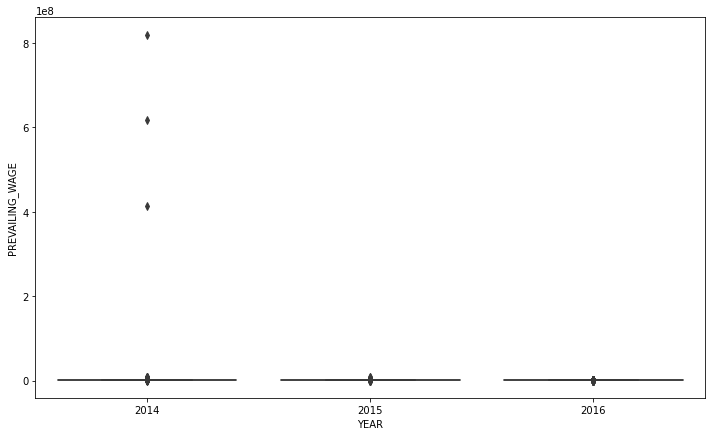

In [44]:
#box plot to view distribution of data 
plt.figure(figsize=(12, 7))
sns.boxplot(x= copydf.YEAR, y= copydf.PREVAILING_WAGE,data= copydf,palette='winter')

<AxesSubplot:xlabel='YEAR', ylabel='WAGE_RATE_OF_PAY_FROM'>

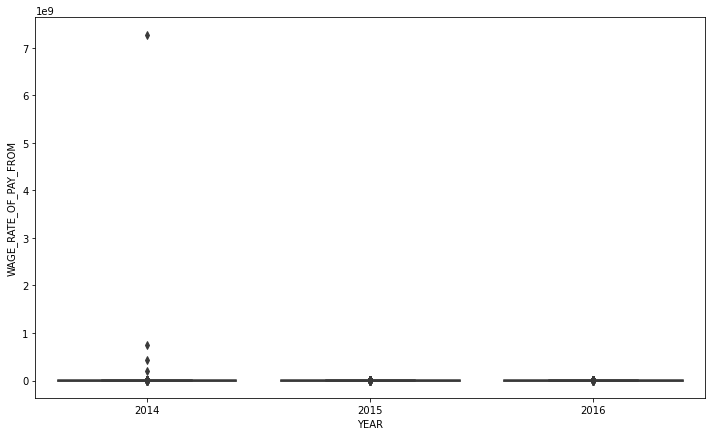

In [45]:
#box plot to view distribution of data 
plt.figure(figsize=(12, 7))
sns.boxplot(x= copydf.YEAR, y= copydf.WAGE_RATE_OF_PAY_FROM,data= copydf,palette='winter')

The two graphs above for the distribution of 'prevailing wage' and 'wage rate of pay from' in each year  show significant presence of outliers. The next step is to remove the outliers in the data

## Removing Outliers 

Outliers were removed from the 'PREVAILING_WAGE' and 'WAGE_RATE_OF_PAY_FROM'  columns using the interquartile range (IQR) method, where any data point outside the range of 1.5 times the IQR below the first quartile or above the third quartile was considered an outlier. This method was chosen to remove erroneous values (data points that are incorrect or inconsistent with the rest of the data. These can be due to errors in data collection or entry) .

In [46]:
# Calculate IQR for PREVAILING_WAGE
Q1_wage = copydf['PREVAILING_WAGE'].quantile(0.25)
Q3_wage = copydf['PREVAILING_WAGE'].quantile(0.75)
IQR_wage = Q3_wage - Q1_wage

# Define lower and upper bounds for PREVAILING_WAGE
lower_bound_wage = Q1_wage - 1.5 * IQR_wage
upper_bound_wage = Q3_wage + 1.5 * IQR_wage

# Calculate IQR for WAGE_RATE_OF_PAY_FROM
Q1_pay = copydf['WAGE_RATE_OF_PAY_FROM'].quantile(0.25)
Q3_pay = copydf['WAGE_RATE_OF_PAY_FROM'].quantile(0.75)
IQR_pay = Q3_pay - Q1_pay

# Define lower and upper bounds for WAGE_RATE_OF_PAY_FROM
lower_bound_pay = Q1_pay - 1.5 * IQR_pay
upper_bound_pay = Q3_pay + 1.5 * IQR_pay

# Filter out outliers
non_outliers = copydf[(copydf['PREVAILING_WAGE'] >= lower_bound_wage) & (copydf['PREVAILING_WAGE'] <= upper_bound_wage) & (copydf['WAGE_RATE_OF_PAY_FROM'] >= lower_bound_pay) & (copydf['WAGE_RATE_OF_PAY_FROM'] <= upper_bound_pay)]

# Print the number of outliers and non-outliers
print('Number of outliers:', len(copydf) - len(non_outliers))
print('Number of non-outliers:', len(non_outliers))

Number of outliers: 109473
Number of non-outliers: 1634451


In [47]:
non_outliers

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,YEAR
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,TEXAS STATE UNIVERSITY-SAN MARCOS,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,SAN MARCOS,TX,43118.0,Year,50000.0,Year,2014
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,"EYE SPECIALISTS OF INDIANA, P.C.",Optometrists,OPTOMETRIST,INDIANAPOLIS,IN,64251.0,Year,65000.0,Year,2014
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,"LHB, INC.",Actors,FOOD SAFETY SCIENTIST,FARG,WI,50000.0,Year,50000.0,Year,2014
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,"WAM USA, INC.",Accountants and Auditors,INTERNATIONAL ACCOUNTANT,LAWRENCEVILLE,GA,47424.0,Year,48000.0,Year,2014
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,"DFUSE TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,SAN JOSE,CA,61589.0,Year,62000.0,Year,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1786148,I-200-16056-684951,WITHDRAWN,2016-02-25 00:00:00,2016-03-04 00:00:00,H-1B,"HEXAWARE TECHNOLOGIES, INC.","SOFTWARE DEVELOPERS, APPLICATIONS",TECHNICAL ARCHITECT,RESTON,VA,69638.0,Year,70200.0,Year,2016
1786149,I-200-16140-578441,CERTIFIED,2016-05-19 00:00:00,2016-05-25 00:00:00,H-1B,UNIVERSITY OF MICHIGAN,AUTOMOTIVE ENGINEERS,RESEARCH FELLOW,ANN ARBOR,MI,49800.0,Year,52000.0,Year,2016
1786150,I-200-15299-198138,CERTIFIED,2015-10-26 00:00:00,2015-10-30 00:00:00,H-1B,HINDUJA TECH INC.,MECHANICAL ENGINEERS,SENIOR ENGINEER,SALINE,MI,75275.0,Year,92000.0,Year,2016
1786151,I-200-16071-784410,WITHDRAWN,2016-03-11 00:00:00,2016-03-11 00:00:00,H-1B,L&T TECHNOLOGY SERVICES LIMITED,MECHANICAL ENGINEERS,MECHANICAL ENGINEER,HAMMOND,IN,53518.0,Year,60000.0,Year,2016


In [48]:
non_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634451 entries, 0 to 1786152
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   CASE_NUMBER            1634451 non-null  object        
 1   CASE_STATUS            1634451 non-null  object        
 2   CASE_SUBMITTED         1634451 non-null  datetime64[ns]
 3   DECISION_DATE          1634451 non-null  datetime64[ns]
 4   VISA_CLASS             1634451 non-null  object        
 5   EMPLOYER_NAME          1634451 non-null  object        
 6   SOC_NAME               1634451 non-null  object        
 7   JOB_TITLE              1634451 non-null  object        
 8   WORKSITE_CITY          1634451 non-null  object        
 9   WORKSITE_STATE         1634451 non-null  object        
 10  PREVAILING_WAGE        1634451 non-null  float64       
 11  PW_UNIT_OF_PAY         1634451 non-null  object        
 12  WAGE_RATE_OF_PAY_FROM  16344

In [49]:
# check for measurement min and max amount across prevailing wage 

check_1 = non_outliers.groupby('PW_UNIT_OF_PAY')['PREVAILING_WAGE'].agg(['min', 'max'])
check_1

,min,max
PW_UNIT_OF_PAY,,
Year,16764.8,121930.0


In [50]:
# check for measurement min and max amount across wage rate

check_2 = non_outliers.groupby('WAGE_UNIT_OF_PAY')['WAGE_RATE_OF_PAY_FROM'].agg(['min', 'max'])
check_2

,min,max
WAGE_UNIT_OF_PAY,,
Year,15500.0,138227.0


# Data Analysis 

<AxesSubplot:xlabel='YEAR', ylabel='PREVAILING_WAGE'>

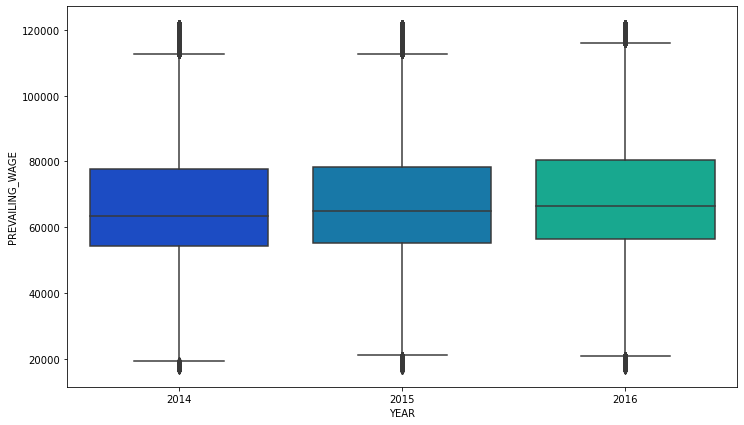

In [51]:
# Boxplot of Year vs Prevailing Wage

plt.figure(figsize=(12, 7))
sns.boxplot(x= non_outliers.YEAR, y= non_outliers.PREVAILING_WAGE,data= copydf,palette='winter')

<AxesSubplot:xlabel='YEAR', ylabel='WAGE_RATE_OF_PAY_FROM'>

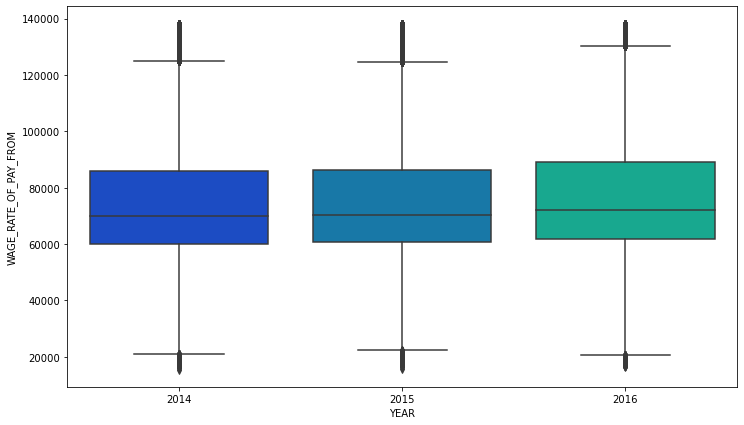

In [52]:
# Box Plot of Year vs Wage rate of pay
plt.figure(figsize=(12, 7))
sns.boxplot(x= non_outliers.YEAR, y= non_outliers.WAGE_RATE_OF_PAY_FROM,data= copydf,palette='winter')

The distribution of values in the 'prevailing wage' and 'wage pay from' are now more normally distributed and almost positively skewed.  

array([[<AxesSubplot:title={'center':'CASE_SUBMITTED'}>,
        <AxesSubplot:title={'center':'DECISION_DATE'}>],
       [<AxesSubplot:title={'center':'PREVAILING_WAGE'}>,
        <AxesSubplot:title={'center':'WAGE_RATE_OF_PAY_FROM'}>],
       [<AxesSubplot:title={'center':'YEAR'}>, <AxesSubplot:>]],
      dtype=object)

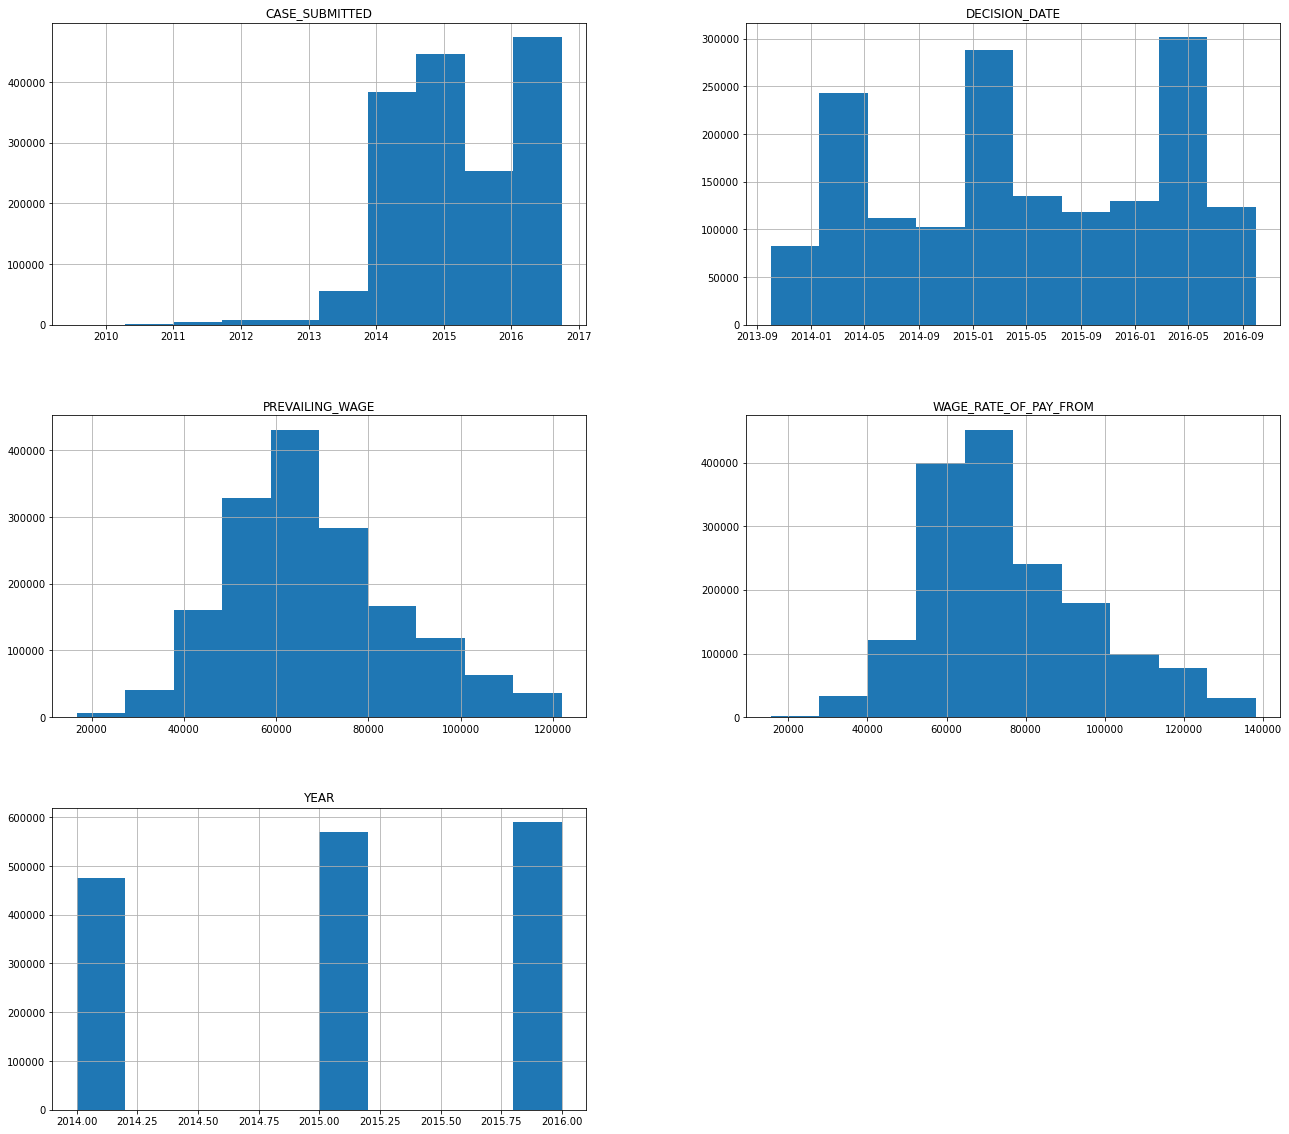

In [53]:
# A quick overview of distribution of the numerical variables

non_outliers.hist(figsize=(22,20))

In [54]:
# Quick view of categorical variable

non_outliers.describe(include='object')

,CASE_NUMBER,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PW_UNIT_OF_PAY,WAGE_UNIT_OF_PAY
count,1634451,1634451,1634451,1634451,1634451,1634451,1634451,1634451,1634451,1634451
unique,1600693,5,1,129219,1778,159158,12727,58,1,1
top,I-200-15076-013913,CERTIFIED,H-1B,INFOSYS LIMITED,COMPUTER SYSTEMS ANALYSTS,PROGRAMMER ANALYST,NEW YORK,CA,Year,Year
freq,11,1443036,1634451,81513,210331,149414,83987,284310,1634451,1634451


## Who are the top 10 employers of H1-B employees? 

In [55]:
# Group the data by year and employer name, and count the number of petitions filed
employer_petitions = non_outliers.groupby(['YEAR', 'EMPLOYER_NAME']).size().reset_index(name='PETITIONS_FILED')

# Find the employers who filed the most petitions each year
top_employers = employer_petitions.groupby('YEAR').apply(lambda x: x.nlargest(10, 'PETITIONS_FILED'))

# Display the top employers each year
top_employers = top_employers[['YEAR', 'EMPLOYER_NAME', 'PETITIONS_FILED']]
# Display the top employers each year
top_employers

YEAR                                    EMPLOYER_NAME  \
YEAR                                                                 
2014 26052   2014                                  INFOSYS LIMITED   
     52039   2014                TATA CONSULTANCY SERVICES LIMITED   
     59496   2014                                    WIPRO LIMITED   
     14628   2014                          DELOITTE CONSULTING LLP   
     864     2014                                    ACCENTURE LLP   
     25091   2014                        IBM INDIA PRIVATE LIMITED   
     23581   2014                                HCL AMERICA, INC.   
     17880   2014                           ERNST & YOUNG U.S. LLP   
     34669   2014                            MICROSOFT CORPORATION   
     25332   2014                          IGATE TECHNOLOGIES INC.   
2015 88357   2015                                  INFOSYS LIMITED   
     115089  2015                TATA CONSULTANCY SERVICES LIMITED   
     122935  2015                                    WIPRO LIMITED   
     87317   2015                        IBM INDIA PRIVATE LIMITED   
     61789   2015                                    ACCENTURE LLP   
     76138   2015                          DELOITTE CONSULTING LLP   
     85698   2015                                HCL AMERICA, INC.   
     87587   2015                          IGATE TECHNOLOGIES INC.   
     79728   2015                           ERNST & YOUNG U.S. LLP   
     97162   2015                            MICROSOFT CORPORATION   
2016 151727  2016                                  INFOSYS LIMITED   
     134107  2016                            CAPGEMINI AMERICA INC   
     178576  2016                TATA CONSULTANCY SERVICES LIMITED   
     186415  2016                                    WIPRO LIMITED   
     150693  2016                        IBM INDIA PRIVATE LIMITED   
     125365  2016                                    ACCENTURE LLP   
     139815  2016                          DELOITTE CONSULTING LLP   
     178760  2016                    TECH MAHINDRA (AMERICAS),INC.   
     136764  2016  COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION   
     149035  2016                                HCL AMERICA, INC.   

             PETITIONS_FILED  
YEAR                          
2014 26052             23603  
     52039             14091  
     59496              8343  
     14628              6575  
     864                5430  
     25091              4971  
     23581              4717  
     17880              3407  
     34669              3232  
     25332              3119  
2015 88357             32936  
     115089            16548  
     122935            12165  
     87317             10685  
     61789              9463  
     76138              7355  
     85698              6068  
     87587              4545  
     79728              3649  
     97162              3628  
2016 151727            24974  
     134107            16167  
     178576            13126  
     186415            10563  
     150693             9778  
     125365             9145  
     139815             7406  
     178760             6707  
     136764             5205  
     149035             4841

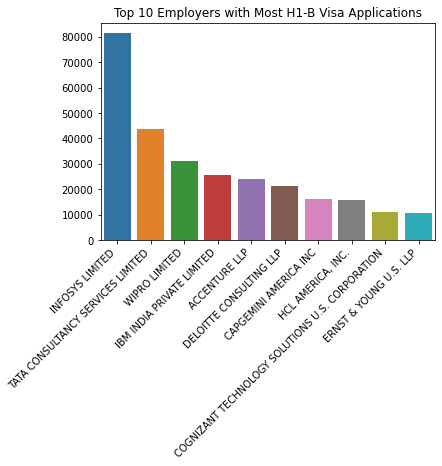

<Figure size 1080x720 with 0 Axes>

In [56]:
# a bar chart of the top 10 employers with the most H1-B visa applications
top_employers = non_outliers['EMPLOYER_NAME'].value_counts().head(10)
sns.barplot(x=top_employers.index, y=top_employers.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Employers with Most H1-B Visa Applications')
plt.figure(figsize=(15, 10))
plt.show()

Infosys Limited was the top applicant with the highest number of application across all three years.  

## Correlation

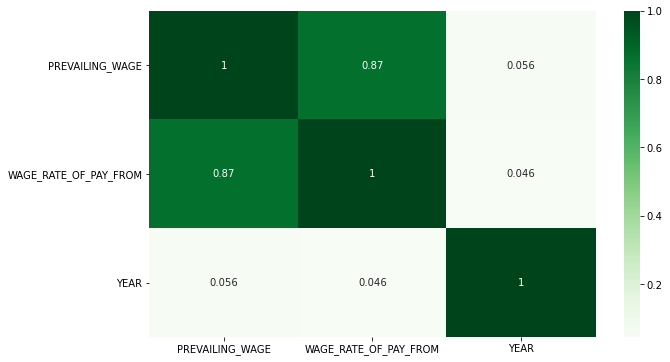

In [57]:
# checking for correlation within the numerical variables
plt.figure(figsize=(10,6))
sns.heatmap(non_outliers.corr(), annot=True, cmap='Greens')
plt.show()

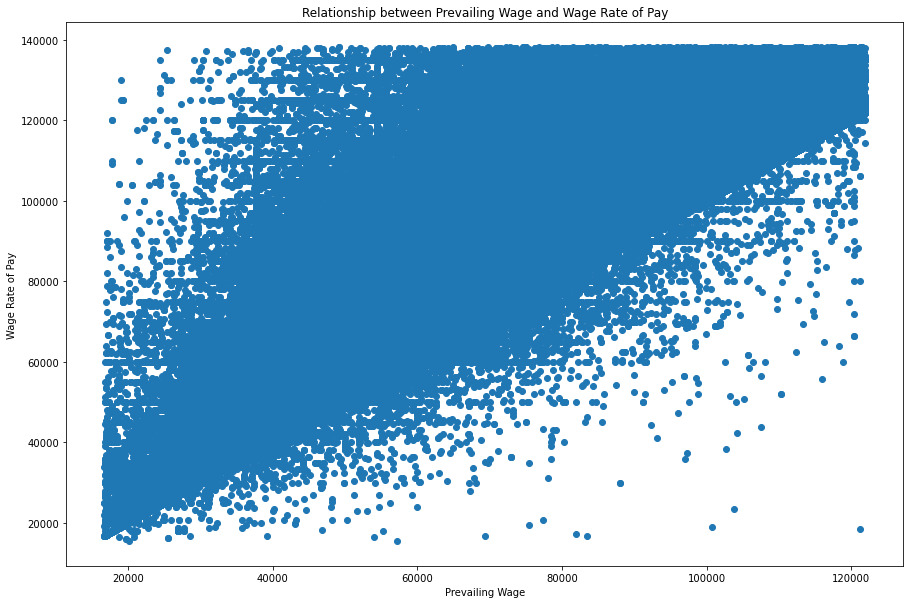

In [58]:
# Investigating the relationship between the prevailing wage and the wage rate of pay

plt.figure(figsize=(15, 10))
plt.scatter(non_outliers['PREVAILING_WAGE'], non_outliers['WAGE_RATE_OF_PAY_FROM'])
plt.xlabel('Prevailing Wage')
plt.ylabel('Wage Rate of Pay')
plt.title('Relationship between Prevailing Wage and Wage Rate of Pay')
plt.show()

Based on the graphs above prevailing wage and wage rate of pay shows a strong positive correlation of 0.87 which indicates a relationship or connection between the two variables

### Investigating if there's a correleation between 'CASE_STATUS', 'PREVAILING_WAGE', and 'WAGE_RATE_OF_PAY_FROM'


In [59]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

# Create a new LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'CASE_STATUS' column
non_outliers['CASE_STATUS_ENCODED'] = le.fit_transform(non_outliers['CASE_STATUS'])


<ipython-input-59-8926ed0cfc24>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers['CASE_STATUS_ENCODED'] = le.fit_transform(non_outliers['CASE_STATUS'])


In [60]:
# check for correlation 'CASE_STATUS_ENCODED', 'PREVAILING_WAGE', 'WAGE_RATE_OF_PAY_FROM'
data = non_outliers[['CASE_STATUS_ENCODED', 'PREVAILING_WAGE', 'WAGE_RATE_OF_PAY_FROM']]

# Calculate the correlation matrix
corr = data.corr()

In [61]:
corr

,CASE_STATUS_ENCODED,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM
CASE_STATUS_ENCODED,1.000000,-0.018839,-0.020511
PREVAILING_WAGE,-0.018839,1.000000,0.867370
WAGE_RATE_OF_PAY_FROM,-0.020511,0.867370,1.000000


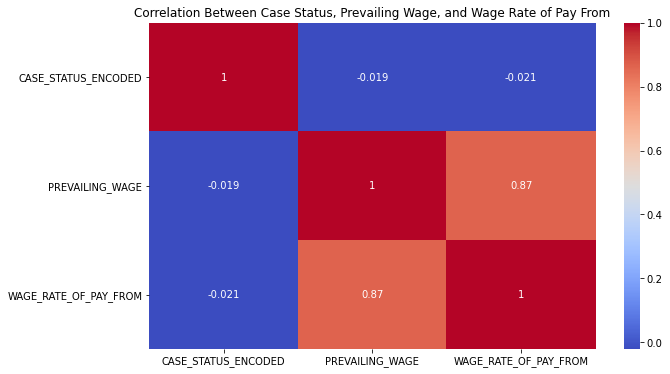

In [62]:
# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Case Status, Prevailing Wage, and Wage Rate of Pay From')
plt.show()

Based on the correlation plot above, there's little or no correlation between 'CASE_STATUS', 'PREVAILING_WAGE', and 'WAGE_RATE_OF_PAY_FROM'

## Distribution of Case Status 

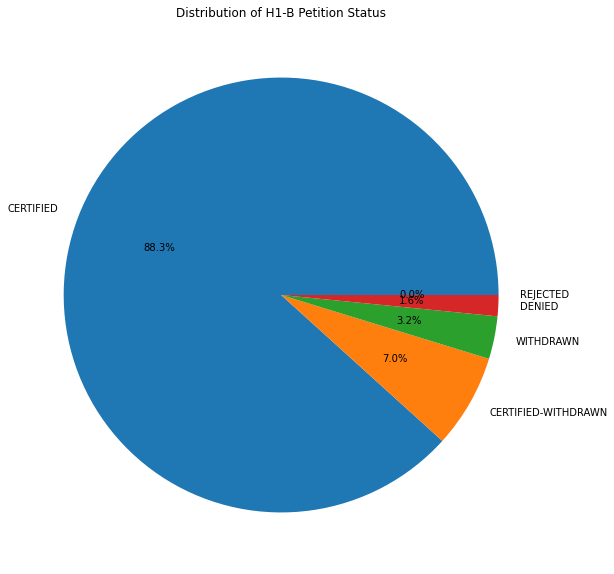

In [63]:
# a pie chart to show the distribution of the case status across the dataset

# Count the frequency of each unique value in the CASE_STATUS column
status_counts = non_outliers['CASE_STATUS'].value_counts()

# Plot a pie chart of the distribution
plt.figure(figsize=(15,10))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of H1-B Petition Status')
plt.show()

In [64]:
# to get a better understanding of the variable 

status = non_outliers.CASE_STATUS.value_counts().to_frame()
status["percent"] = (status.apply(lambda x: x/x.sum()*100).round(2))
display(status)

,CASE_STATUS,percent
CERTIFIED,1443036,88.29
CERTIFIED-WITHDRAWN,113915,6.97
WITHDRAWN,51889,3.17
DENIED,25609,1.57
REJECTED,2,0.00


The graph and table above depict the distribution of H1-B visa case status over a three-year period. H1-B visas with certified status cases accounted for 88% of the total data. H1-B visas with status certified-withdrawn accounted for 7%, H1-B visas with withdrawn status accounted for 3%, and H1-B visas with case status denied accounted for 2%. Furthermore, only two(2) H1-B visa cases were rejected across the dataset. 






<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

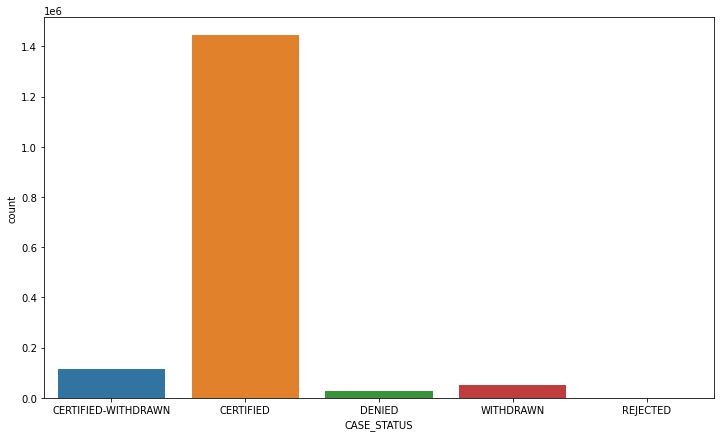

In [65]:
# distribution of case status
plt.figure(figsize=(12, 7)) 
sns.countplot(x='CASE_STATUS', data= non_outliers)

In [66]:
# break down of status across each year
status_year = non_outliers.groupby(['YEAR', 'CASE_STATUS']).size().reset_index(name='count')
status_year["percent"] = (status_year.groupby('YEAR')['count'].apply(lambda x: x / x.sum() * 100)).round(2)
display(status_year)

,YEAR,CASE_STATUS,count,percent
0,2014,CERTIFIED,417951,88.02
1,2014,CERTIFIED-WITHDRAWN,33272,7.01
2,2014,DENIED,9364,1.97
3,2014,REJECTED,2,0.00
4,2014,WITHDRAWN,14225,3.00
5,2015,CERTIFIED,505697,88.73
6,2015,CERTIFIED-WITHDRAWN,37654,6.61
7,2015,DENIED,8860,1.55
8,2015,WITHDRAWN,17733,3.11
9,2016,CERTIFIED,519388,88.08


About 88% of all applications filed within each year were certified. Denied applications reduced from 1.97% in 2014 to 1.55% in 2015, and finally 1.25% in 2016. Only 2 applications were ever rejected and this was in 2014 only.

## Prevailing Wage

In [67]:
# Aggregate min, max, and average of prevailing wage
pw_agg = non_outliers['PREVAILING_WAGE'].agg(['min', 'max', 'mean']).round(2)
pw_agg

min      16764.80
max     121930.00
mean     68039.65
Name: PREVAILING_WAGE, dtype: float64

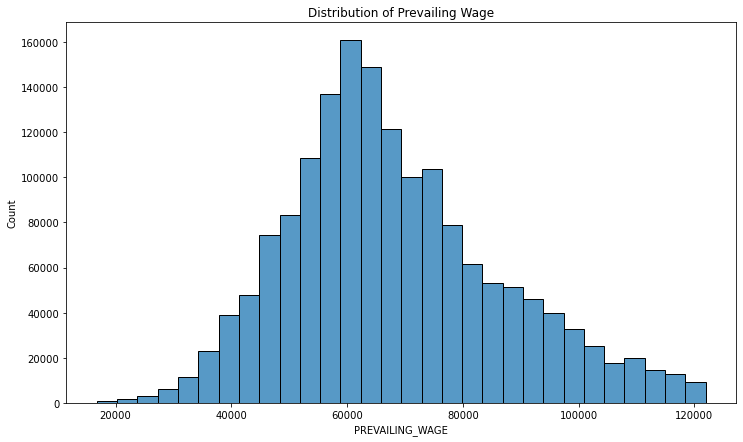

In [68]:
# a histogram showing the distribution of the prevailing wage
plt.figure(figsize=(12, 7))
sns.histplot(non_outliers['PREVAILING_WAGE'], bins= 30, kde=False)
plt.title('Distribution of Prevailing Wage')
plt.show()

The graph reveals an almost normal distribution.  

## Wage Rate of Pay  

In [69]:
# Aggregate min, max, and average of wage rate of pay from
wrp_agg = non_outliers['WAGE_RATE_OF_PAY_FROM'].agg(['min', 'max', 'mean']).round(2)
wrp_agg

min      15500.00
max     138227.00
mean     75359.85
Name: WAGE_RATE_OF_PAY_FROM, dtype: float64

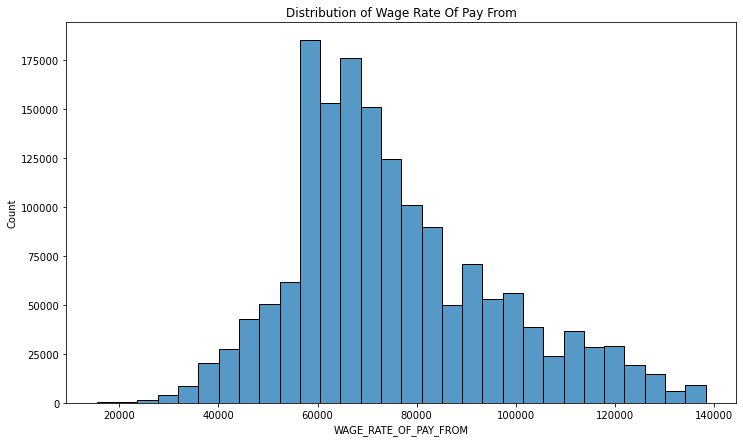

In [70]:
# a histogram showing the distribution of the wage rate of pay
plt.figure(figsize=(12, 7))
sns.histplot(non_outliers['WAGE_RATE_OF_PAY_FROM'],bins= 30, kde=False)
plt.title('Distribution of Wage Rate Of Pay From')
plt.show()

The graph shows a positively skewed distribution

## Top 10 Job Titles 

In [71]:
# the top 10 job titles for H1-B visa applications

non_outliers['JOB_TITLE'].value_counts().head(10)

PROGRAMMER ANALYST          149414
SOFTWARE ENGINEER            71712
COMPUTER PROGRAMMER          40427
SYSTEMS ANALYST              34989
SOFTWARE DEVELOPER           31149
BUSINESS ANALYST             24885
COMPUTER SYSTEMS ANALYST     21369
TECHNOLOGY LEAD - US         18700
TECHNOLOGY ANALYST - US      16922
CONSULTANT                   13978
Name: JOB_TITLE, dtype: int64

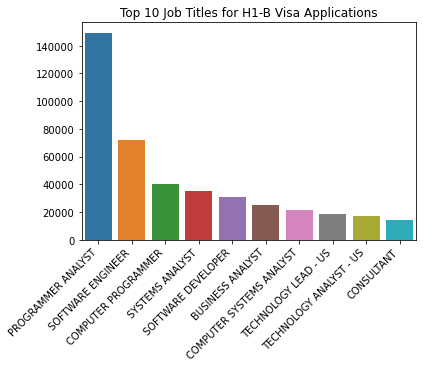

<Figure size 1080x720 with 0 Axes>

In [72]:
# a bar chart of the top 10 job titles for H1-B visa applications

top_jobs = non_outliers['JOB_TITLE'].value_counts().head(10)
sns.barplot(x=top_jobs.index, y=top_jobs.values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Job Titles for H1-B Visa Applications')
plt.figure(figsize=(15, 10))
plt.show()

Programmer Analyst is the top job title of H1-B employees. It is almost 50% higher than the second most job title i.e 'Software Engineer'.

In [73]:
non_outliers.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,WORKSITE_CITY,WORKSITE_STATE,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_UNIT_OF_PAY,YEAR,CASE_STATUS_ENCODED
0,I-200-09106-546545,CERTIFIED-WITHDRAWN,2013-01-18 18:05:43,2014-09-29 15:59:50,H-1B,TEXAS STATE UNIVERSITY-SAN MARCOS,"Biological Scientists, All Other",POSTDOCTORAL RESEARCH ASSOCIATE,SAN MARCOS,TX,43118.0,Year,50000.0,Year,2014,1
1,I-200-09162-143337,CERTIFIED,2014-03-17 11:11:45,2014-03-21 23:11:51,H-1B,"EYE SPECIALISTS OF INDIANA, P.C.",Optometrists,OPTOMETRIST,INDIANAPOLIS,IN,64251.0,Year,65000.0,Year,2014,0
2,I-200-09182-550211,DENIED,2014-03-14 17:05:01,2014-03-20 16:59:49,H-1B,"LHB, INC.",Actors,FOOD SAFETY SCIENTIST,FARG,WI,50000.0,Year,50000.0,Year,2014,2
3,I-200-09193-873099,CERTIFIED,2014-03-01 12:37:02,2014-03-06 22:03:37,H-1B,"WAM USA, INC.",Accountants and Auditors,INTERNATIONAL ACCOUNTANT,LAWRENCEVILLE,GA,47424.0,Year,48000.0,Year,2014,0
4,I-200-09197-120609,CERTIFIED-WITHDRAWN,2014-03-10 15:33:41,2014-03-17 10:52:46,H-1B,"DFUSE TECHNOLOGIES, INC.",Computer Programmers,PROGRAMMER ANALYST,SAN JOSE,CA,61589.0,Year,62000.0,Year,2014,1


## Top 10 Worksite State and City

In [74]:
# count the number of occurrences of each worksite state and city
state_counts = non_outliers['WORKSITE_STATE'].value_counts()
city_counts = non_outliers['WORKSITE_CITY'].value_counts()




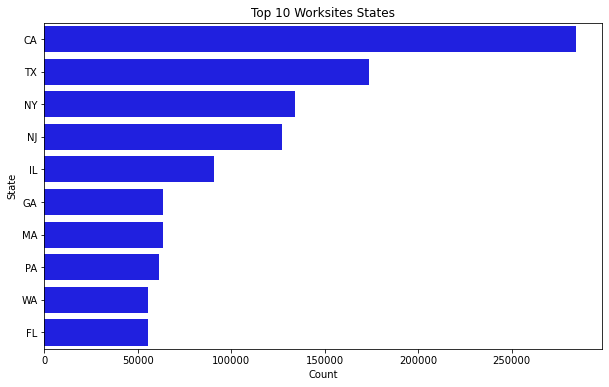

In [75]:
# Distribution of the top 10 states with H1-B petitions
plt.figure(figsize=(10,6))
sns.barplot(x=state_counts[:10], y=state_counts[:10].index, color='b')
plt.title('Top 10 Worksites States')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()


California has the highest number of applications while Florida is the 10th most highest.  

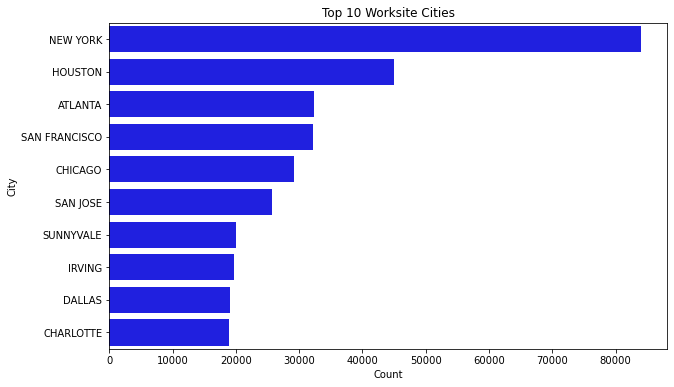

In [76]:
# Distibution of the top 10 cities with H1-B petitions
plt.figure(figsize=(10,6))
sns.barplot(x=city_counts[:10], y=city_counts[:10].index, color='b')
plt.title('Top 10 Worksite Cities')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

New York is the city with the highest application although it is not located within California which is the highest state as earlier found. San Francisco which is located with California is the 4th highest city.  

## Top Employers and Distribution of Case Status

In [77]:
# Group the data by employer name and case status
employer_grouped = df.groupby(['EMPLOYER_NAME', 'CASE_STATUS']).size().reset_index(name='PETITIONS_FILED')

# Pivot the data to have case status as columns
pivot = employer_grouped.pivot(index='EMPLOYER_NAME', columns='CASE_STATUS', values='PETITIONS_FILED')

# Sort by the total number of petitions filed
pivot['TOTAL'] = pivot.sum(axis=1)
pivot = pivot.sort_values(by='TOTAL', ascending=False)


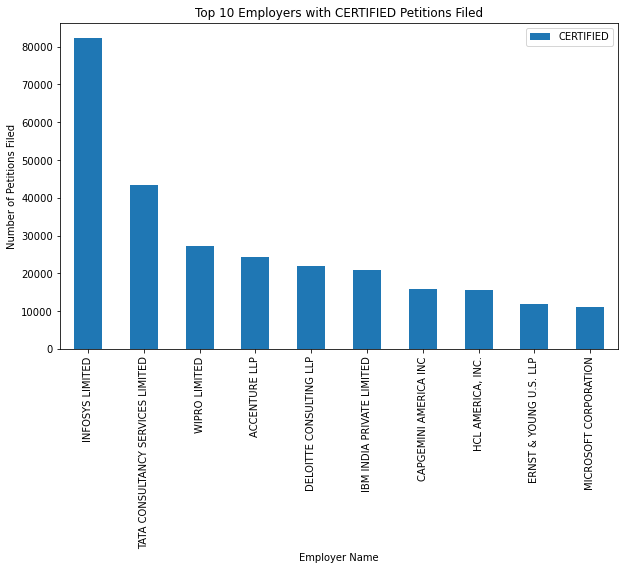

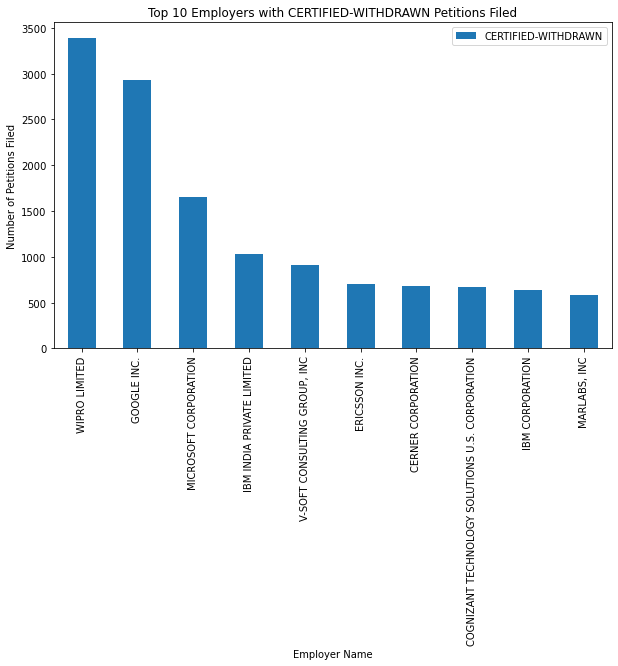

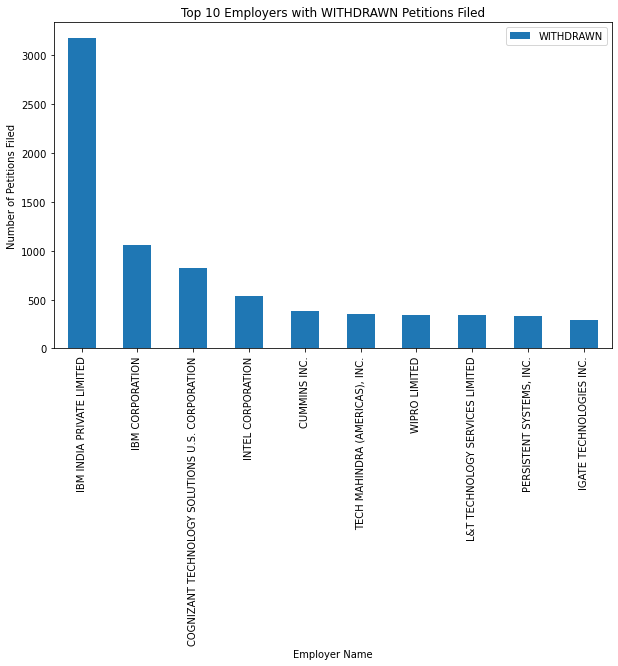

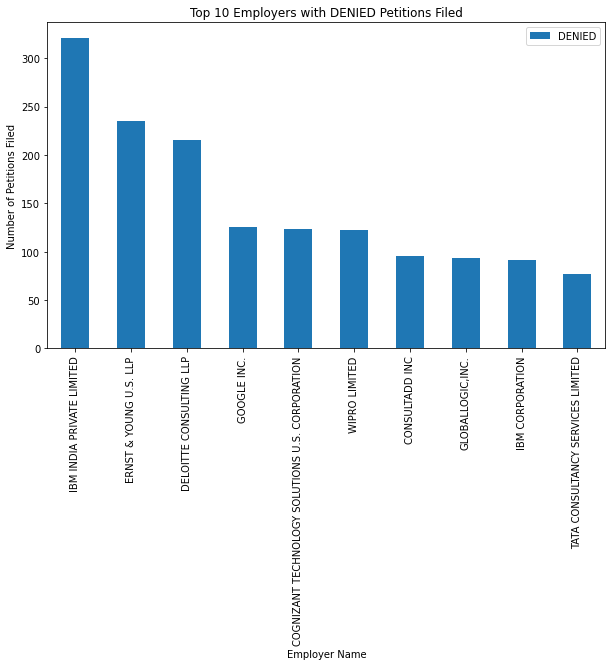

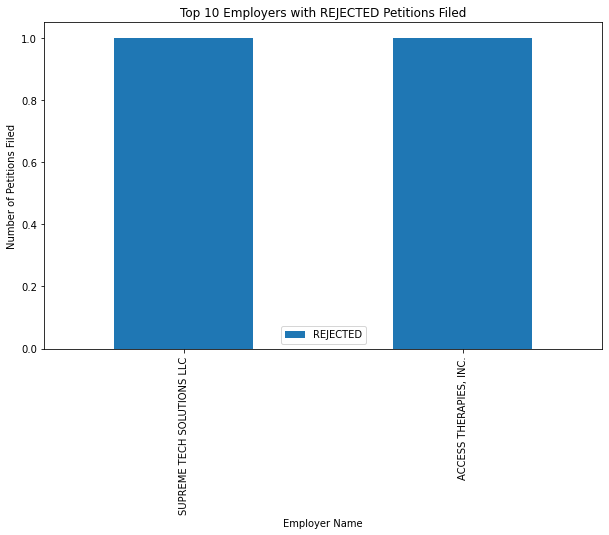

In [78]:
# Distribution of the top 10 employers for each case status
statuses = ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED', 'REJECTED']
for status in statuses:
    top_employers = pivot.nlargest(10, status)
    top_employers.plot(kind='bar', y=status, figsize=(10, 6))
    plt.title('Top 10 Employers with {} Petitions Filed'.format(status))
    plt.xlabel('Employer Name')
    plt.ylabel('Number of Petitions Filed')
    plt.show()

Infosys Limited has the most accepted applications filed.  IBM India Private Limited had the highest number of applications denied. The only two rejected employers were Supreme Tech Solutions LLC and Access Therapies, Inc.

## Top Job Titles and Distribution of Case Status 

In [79]:
# Group the data by job title and case status
job_grouped = non_outliers.groupby(['JOB_TITLE', 'CASE_STATUS']).size().reset_index(name='PETITIONS_FILED')

# Pivot the data to have case status as columns
job_pivot = job_grouped.pivot(index='JOB_TITLE', columns='CASE_STATUS', values='PETITIONS_FILED')

# Sort by the total number of petitions filed
job_pivot['TOTAL'] = job_pivot.sum(axis=1)
job_pivot = job_pivot.sort_values(by='TOTAL', ascending=False)


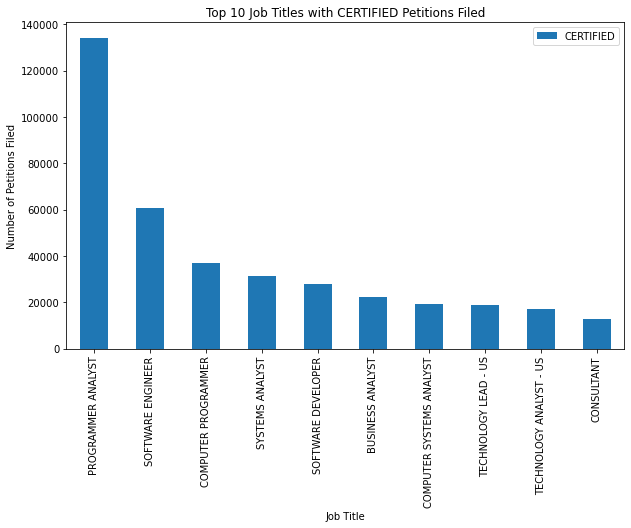

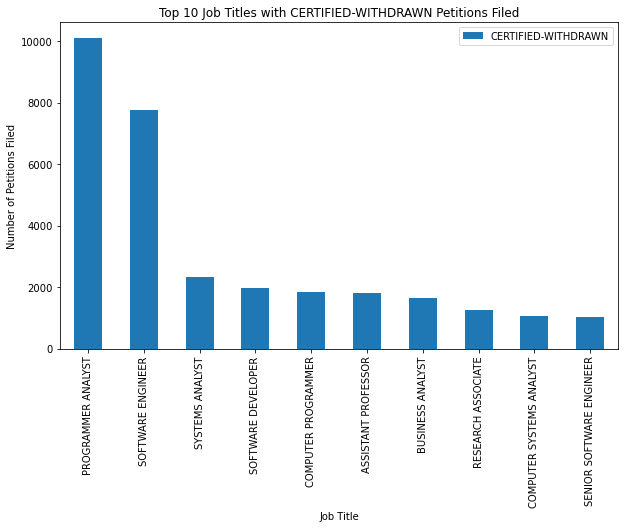

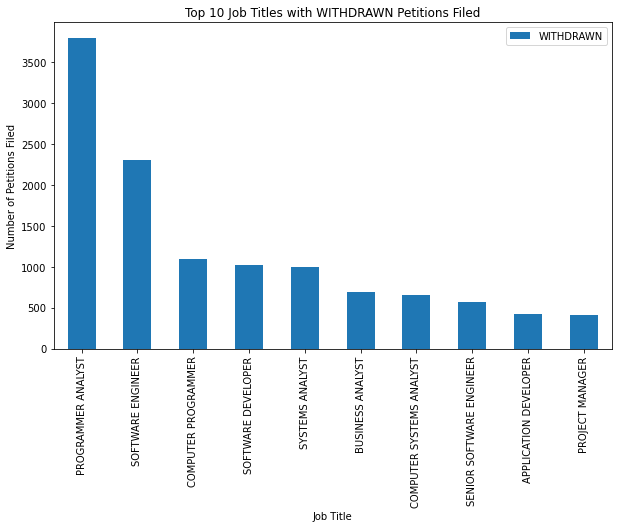

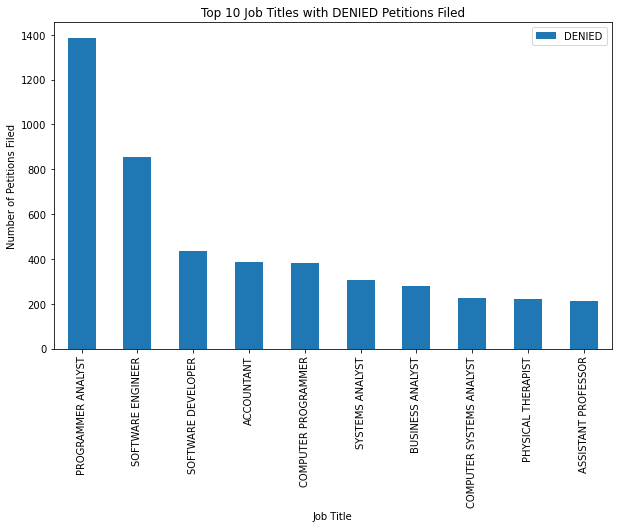

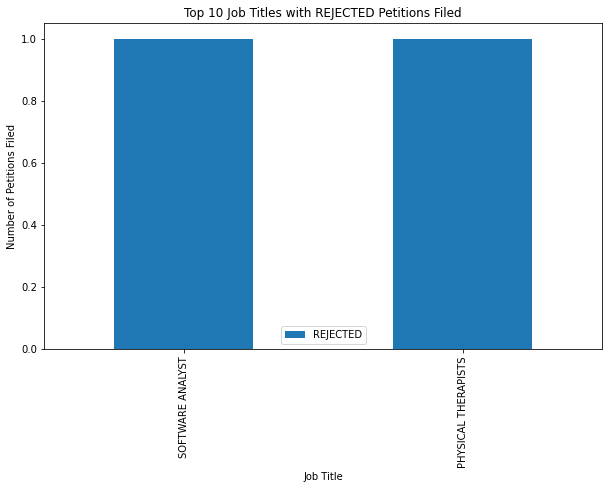

In [80]:
# Distribution of the top 10 job titles  for each case status
job_statuses = ['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED', 'REJECTED']
for status in statuses:
    top_jobs = job_pivot.nlargest(10, status)
    top_jobs.plot(kind='bar', y=status, figsize=(10, 6))
    plt.title('Top 10 Job Titles with {} Petitions Filed'.format(status))
    plt.xlabel('Job Title')
    plt.ylabel('Number of Petitions Filed')
    plt.show()

Programmer Analyst was the most accepted and also the most denied job title in the applications filed.
The only two rejected applications were for a software analyst and physical therapist role. 
